# Optimasi Rute Transportasi Umum Untuk Efisiensi Layanan & Pengurangan Emisi Karbon

> ## Topik:
Studi kasus mengenai **optimasi rute transportasi publik (KRL Jabodetabek)** menggunakan algoritma ***DFS (Depth-First Search)***. Pada program ini akan dilakukan 2 kali simulasi, yaitu pada Rute KRL Jabodetabek (graf statis) dan graf dinamis untuk melihat perbandingan **input size (n).**

> ## Anggota Kelompok
- Nur Shabrina Muslim (103052300035)
- Farand Diy Dat Mahazalfaa (103052300050)



## 1. Langkah Awal: Menggambarkan Graf Rute KRL Jabodetabek menggunakan Networkx dan Matplotlib

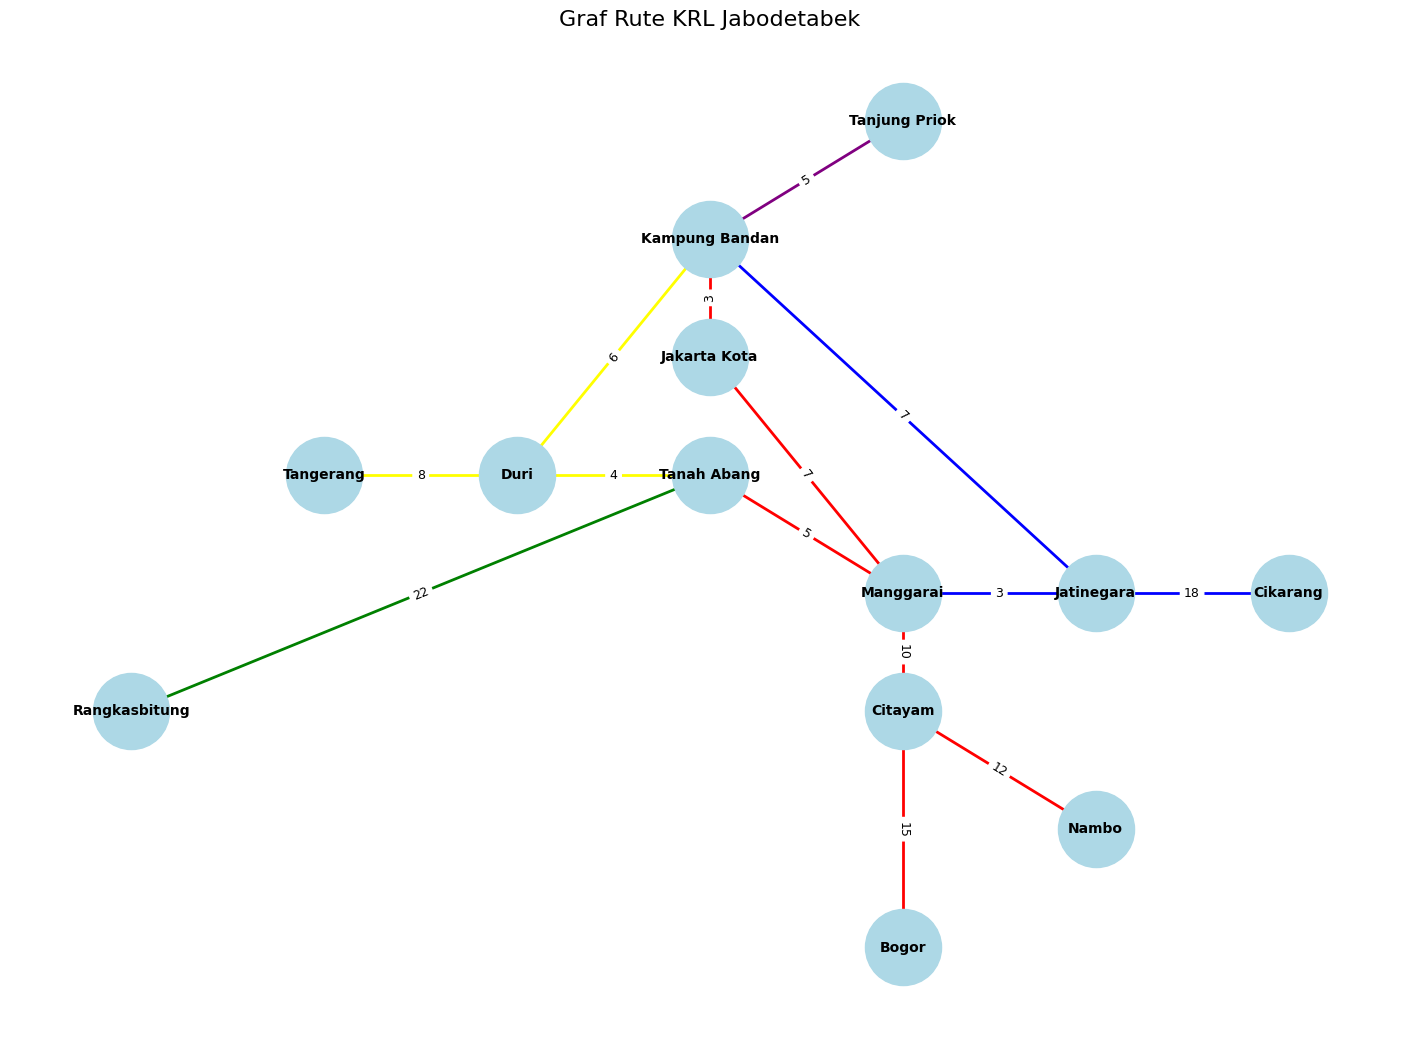

In [423]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graf rute KRL
def create_static_krl_graph():
    G = nx.Graph()
    # Node (Stasiun utama/transit)
    stations = [
        "Tangerang", "Duri", "Tanah Abang", "Rangkasbitung",
        "Manggarai", "Jakarta Kota", "Jatinegara", "Cikarang",
        "Kampung Bandan", "Tanjung Priok", "Citayam", "Bogor", "Nambo"
    ]
    for station in stations:
        G.add_node(station)

    # Edge (Hubungan antar stasiun dengan jarak rata-rata dan warna jalur)
    edges = [
        ("Tangerang", "Duri", 8, 'yellow'),
        ("Duri", "Tanah Abang", 4, 'yellow'),
        ("Tanah Abang", "Rangkasbitung", 22, 'green'),
        ("Tanah Abang", "Manggarai", 5, 'red'),
        ("Manggarai", "Jakarta Kota", 7, 'red'),
        ("Manggarai", "Jatinegara", 3, 'blue'),
        ("Jatinegara", "Cikarang", 18, 'blue'),
        ("Jakarta Kota", "Kampung Bandan", 3, 'red'),
        ("Duri", "Kampung Bandan", 6, 'yellow'),
        ("Jatinegara", "Kampung Bandan", 7, 'blue'),
        ("Kampung Bandan", "Tanjung Priok", 5, 'purple'),
        ("Manggarai", "Citayam", 10, 'red'),
        ("Citayam", "Bogor", 15, 'red'),
        ("Citayam", "Nambo", 12, 'red')
    ]
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2], color=edge[3])

    return G

# Visualisasi graf
def visualize_graph(G, pos, title="Graf Rute KRL Jabodetabek"):
    plt.figure(figsize=(14, 10))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_colors = [G[u][v]['color'] for u, v in G.edges()]

    nx.draw(
        G, pos, with_labels=True,
        node_color='lightblue', node_size=3000, font_size=10, font_weight='bold',
        edge_color=edge_colors, width=2
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
    plt.title(title, fontsize=16)
    plt.show()

# Visualisasi Rute KRL Jabodetabek
static_graph = create_static_krl_graph()
static_pos = {
    "Tangerang": (0, 5), "Duri": (1, 5), "Tanah Abang": (2, 5), "Rangkasbitung": (-1, 3),
    "Manggarai": (3, 4), "Jakarta Kota": (2, 6), "Jatinegara": (4, 4), "Cikarang": (5, 4),
    "Kampung Bandan": (2, 7), "Tanjung Priok": (3, 8), "Citayam": (3, 3), "Bogor": (3, 1), "Nambo": (4, 2)
}
visualize_graph(static_graph, static_pos)


>## Algoritma Iteratif Menggunakan DFS
DFS memiliki kompleksitas
**𝑂(𝑉+𝐸)**, di mana V adalah jumlah node dan 𝐸 adalah jumlah edge.

In [434]:
## Algoritma Iteratif
# DFS Iteratif untuk mencari jalur terbaik
from collections import deque

def dfs_iterative_weighted(graph, start, end):
    stack = deque([(start, [start], 0)])
    best_path = None
    best_cost = float('inf')

    # Initialize visited as a set to store visited nodes
    visited = set()

    while stack:
        (vertex, path, cost) = stack.pop()
        if vertex in visited:
          continue
        visited.add(vertex)
        for next_node, data in graph[vertex].items():
            weight = data['weight']
            if next_node not in path:
                new_cost = cost + weight
                new_path = path + [next_node]
                if next_node == end and new_cost < best_cost:
                    best_path = new_path
                    best_cost = new_cost
                else:
                    stack.append((next_node, new_path, new_cost))

    return best_path, best_cost


>## Algoritma Rekursif Menggunakan DFS

In [435]:
# DFS Rekursif untuk mencari jalur terbaik
def dfs_recursive_weighted(graph, start, end, path=None, cost=0, best=None):
    if path is None:
        path = []
    if best is None:
        best = {'path': None, 'cost': float('inf')}

    path = path + [start]
    if start == end:
        if cost < best['cost']:
            best['path'] = path
            best['cost'] = cost
    else:
        for next_node, data in graph[start].items():
            if next_node not in path:
                dfs_recursive_weighted(graph, next_node, end, path, cost + data['weight'], best)

    return best['path'], best['cost']

>## Testing Algoritma DFS (Iteratif) & DFS (Rekursif) pada Rute KRL Jabodetabek

 Hasil Optimasi DFS (Graf Statis)

>>> Hasil DFS Iteratif:
  Jalur Terbaik: Duri -> Kampung Bandan -> Jatinegara
  Biaya Total  : 13
  Waktu Eksekusi: 0.000206 detik

>>> Hasil DFS Rekursif:
  Jalur Terbaik: Duri -> Tanah Abang -> Manggarai -> Jatinegara
  Biaya Total  : 12
  Waktu Eksekusi: 0.000220 detik




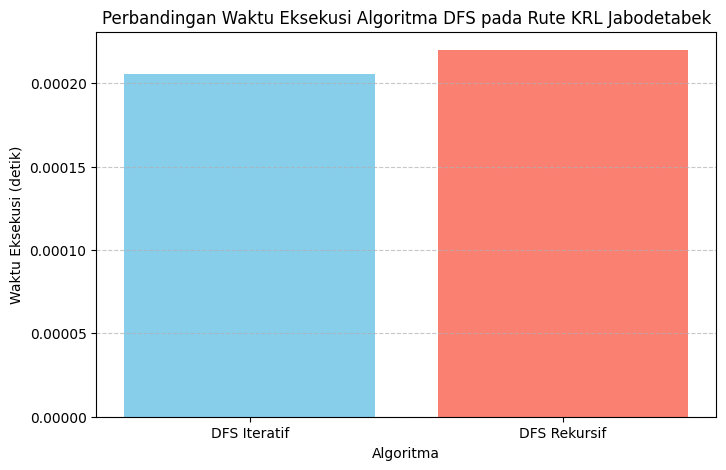

In [445]:
import matplotlib.pyplot as plt

## Testing Algoritma pada Rute KRL Jabodetabek
start_station = "Duri"
end_station = "Jatinegara"

# Iteratif DFS
start_time = time.time()
iterative_path, iterative_cost = dfs_iterative_weighted(nx.to_dict_of_dicts(static_graph), start_station, end_station)
iterative_time = time.time() - start_time

# Rekursif DFS
start_time = time.time()
recursive_path, recursive_cost = dfs_recursive_weighted(nx.to_dict_of_dicts(static_graph), start_station, end_station)
recursive_time = time.time() - start_time

# Print hasil
print("=" * 50)
print(" Hasil Optimasi DFS (Graf Statis)")
print("=" * 50)

# Iteratif DFS
print("\n>>> Hasil DFS Iteratif:")
print(f"  Jalur Terbaik: {' -> '.join(iterative_path)}")
print(f"  Biaya Total  : {iterative_cost}")
print(f"  Waktu Eksekusi: {iterative_time:.6f} detik\n")

# Rekursif DFS
print(">>> Hasil DFS Rekursif:")
print(f"  Jalur Terbaik: {' -> '.join(recursive_path)}")
print(f"  Biaya Total  : {recursive_cost}")
print(f"  Waktu Eksekusi: {recursive_time:.6f} detik")
print("\n")

# Visualisasi perbandingan waktu eksekusi
algorithms = ['DFS Iteratif', 'DFS Rekursif']
times = [iterative_time, recursive_time]

plt.figure(figsize=(8, 5))
plt.bar(algorithms, times, color=['skyblue', 'salmon'])
plt.xlabel("Algoritma")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Waktu Eksekusi Algoritma DFS pada Rute KRL Jabodetabek")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2. Simulasi Graf Dinamis untuk Mengetahui Kompleksitas Waktu dari Input Size N

>## Membuat dan Memvisualisasikan Graf Dinamis

In [446]:
def create_dynamic_krl_graph(base_graph, additional_nodes, min_connections=2):
    G = base_graph.copy()
    dynamic_pos = static_pos.copy()

    # Fungsi untuk menentukan posisi node baru
    def generate_random_position_near(existing_position, radius=3.0):
        import random, math
        angle = random.uniform(0, 2 * math.pi)
        r = random.uniform(0.5, radius)
        return (
            existing_position[0] + r * math.cos(angle),
            existing_position[1] + r * math.sin(angle)
        )

    for i in range(additional_nodes):
        new_station = f"Stasiun {i+1}"
        G.add_node(new_station)

        # Sambungkan ke beberapa stasiun acak dari graf asli
        existing_stations = random.sample(list(base_graph.nodes), k=min_connections)
        for existing_station in existing_stations:
            distance = random.randint(5, 20)
            color = random.choice(['red', 'blue', 'green', 'yellow', 'purple'])
            G.add_edge(new_station, existing_station, weight=distance, color=color)

        # Tentukan posisi baru
        while True:
            new_pos = generate_random_position_near(dynamic_pos[existing_stations[0]])
            if new_station not in dynamic_pos:
                dynamic_pos[new_station] = new_pos
                break

    return G, dynamic_pos

# Visualisasi Graf Dinamis
def visualize_graph_with_edges(graph, positions, title="Graf Dinamis KRL"):
    plt.figure(figsize=(12, 8))
    plt.title(title, fontsize=16)

    # Gambar node
    nx.draw_networkx_nodes(graph, positions, node_size=500, node_color="lightblue")
    nx.draw_networkx_labels(graph, positions, font_size=10, font_color="black")

    # Gambar edges
    edges = graph.edges(data=True)
    for u, v, data in edges:
        weight = data.get('weight', 1)
        color = data.get('color', 'black')
        nx.draw_networkx_edges(
            graph, positions,
            edgelist=[(u, v)],
            width=2,
            edge_color=color,
            alpha=0.7,
        )
        # Tambahkan label untuk bobot edge
        edge_midpoint = (
            (positions[u][0] + positions[v][0]) / 2,
            (positions[u][1] + positions[v][1]) / 2,
        )
        plt.text(
            edge_midpoint[0], edge_midpoint[1],
            str(weight),
            fontsize=8, color="darkred",
            horizontalalignment='center', verticalalignment='center'
        )

    plt.axis("off")
    plt.show()


> ## Pengujian Algoritma pada Graf Dinamis
Gunakan time.time() untuk mencatat waktu mulai dan akhir dari setiap algoritma. dan menghasilkan data pasangan *(n, T(n))*

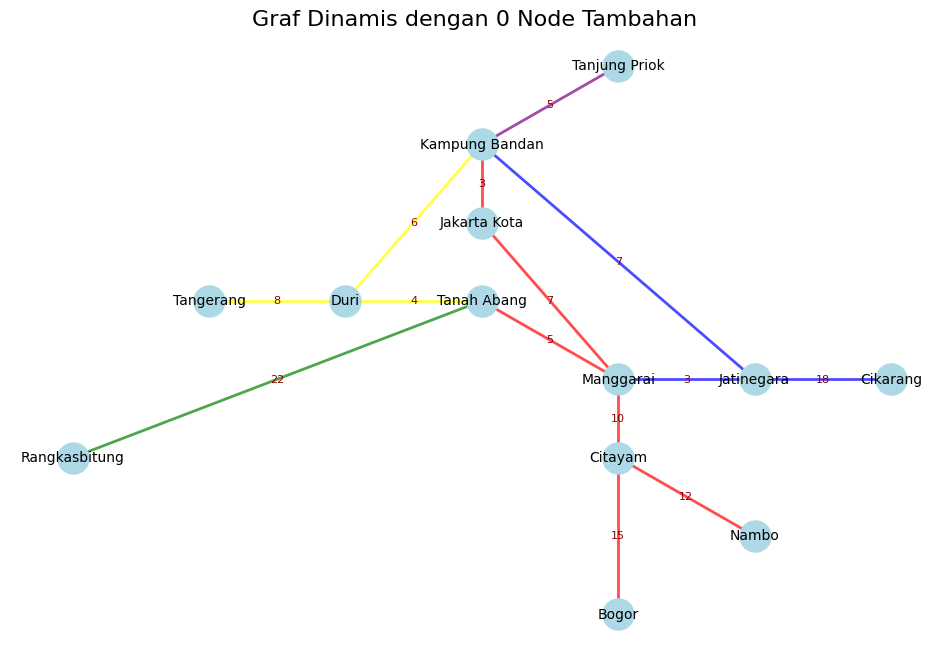

 Pengujian Algoritma dengan 0 Node Tambahan
Stasiun Awal: Tanjung Priok
Stasiun Akhir: Rangkasbitung

>>> Hasil DFS Iteratif:
  Jalur Terbaik : Tanjung Priok -> Kampung Bandan -> Jatinegara -> Manggarai -> Tanah Abang -> Rangkasbitung
  Biaya Total   : 42
  Waktu Eksekusi: 0.000081 detik

>>> Hasil DFS Rekursif:
  Jalur Terbaik : Tanjung Priok -> Kampung Bandan -> Duri -> Tanah Abang -> Rangkasbitung
  Biaya Total   : 37
  Waktu Eksekusi: 0.000081 detik



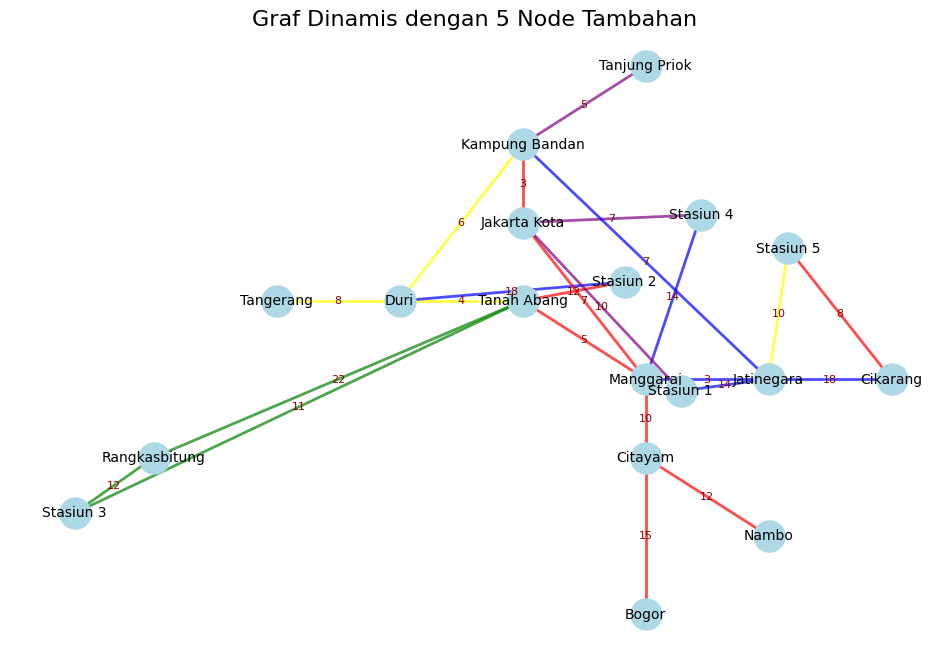

 Pengujian Algoritma dengan 5 Node Tambahan
Stasiun Awal: Jatinegara
Stasiun Akhir: Duri

>>> Hasil DFS Iteratif:
  Jalur Terbaik : Jatinegara -> Stasiun 1 -> Jakarta Kota -> Stasiun 4 -> Manggarai -> Tanah Abang -> Duri
  Biaya Total   : 54
  Waktu Eksekusi: 0.000093 detik

>>> Hasil DFS Rekursif:
  Jalur Terbaik : Jatinegara -> Manggarai -> Tanah Abang -> Duri
  Biaya Total   : 12
  Waktu Eksekusi: 0.000179 detik



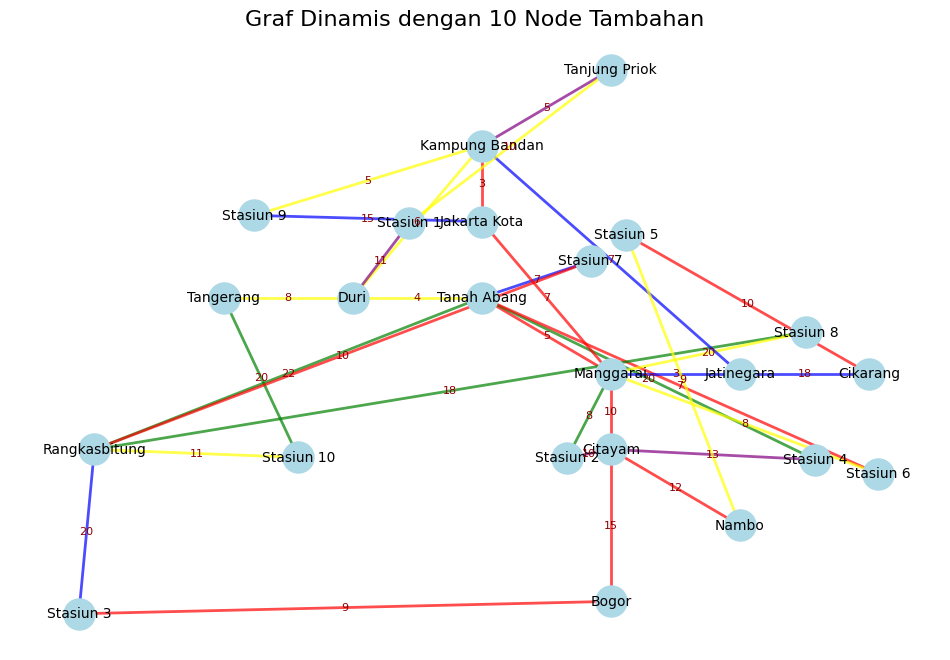

 Pengujian Algoritma dengan 10 Node Tambahan
Stasiun Awal: Stasiun 6
Stasiun Akhir: Jatinegara

>>> Hasil DFS Iteratif:
  Jalur Terbaik : Stasiun 6 -> Tanah Abang -> Stasiun 7 -> Rangkasbitung -> Stasiun 10 -> Tangerang -> Duri -> Stasiun 1 -> Tanjung Priok -> Kampung Bandan -> Jatinegara
  Biaya Total   : 96
  Waktu Eksekusi: 0.000116 detik

>>> Hasil DFS Rekursif:
  Jalur Terbaik : Stasiun 6 -> Manggarai -> Jatinegara
  Biaya Total   : 11
  Waktu Eksekusi: 0.003622 detik



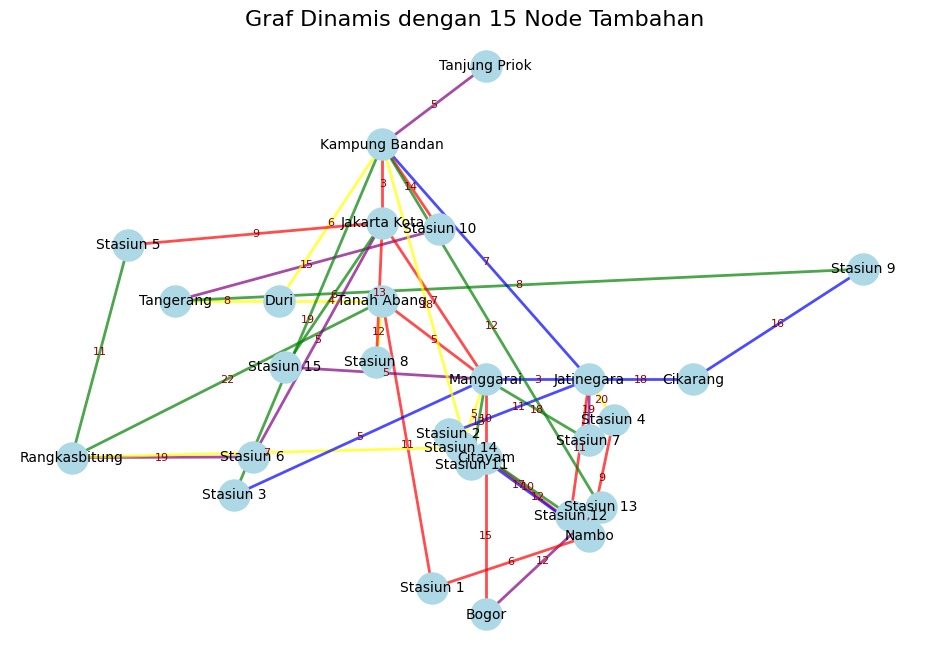

 Pengujian Algoritma dengan 15 Node Tambahan
Stasiun Awal: Tanjung Priok
Stasiun Akhir: Stasiun 9

>>> Hasil DFS Iteratif:
  Jalur Terbaik : Tanjung Priok -> Kampung Bandan -> Stasiun 13 -> Bogor -> Citayam -> Stasiun 12 -> Jatinegara -> Cikarang -> Stasiun 9
  Biaya Total   : 99
  Waktu Eksekusi: 0.000175 detik

>>> Hasil DFS Rekursif:
  Jalur Terbaik : Tanjung Priok -> Kampung Bandan -> Duri -> Tangerang -> Stasiun 9
  Biaya Total   : 27
  Waktu Eksekusi: 0.027264 detik



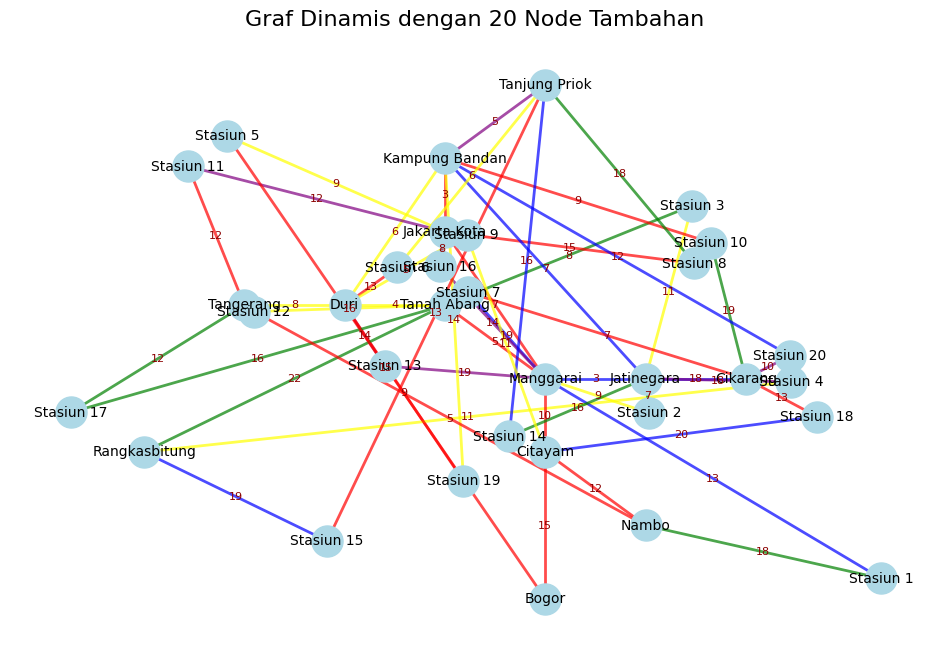

 Pengujian Algoritma dengan 20 Node Tambahan
Stasiun Awal: Rangkasbitung
Stasiun Akhir: Stasiun 7

>>> Hasil DFS Iteratif:
  Jalur Terbaik : Rangkasbitung -> Stasiun 15 -> Tanjung Priok -> Stasiun 14 -> Jatinegara -> Stasiun 3 -> Tanah Abang -> Stasiun 17 -> Tangerang -> Stasiun 11 -> Jakarta Kota -> Stasiun 16 -> Manggarai -> Stasiun 7
  Biaya Total   : 176
  Waktu Eksekusi: 0.000179 detik

>>> Hasil DFS Rekursif:
  Jalur Terbaik : Rangkasbitung -> Tanah Abang -> Manggarai -> Stasiun 7
  Biaya Total   : 46
  Waktu Eksekusi: 0.629797 detik



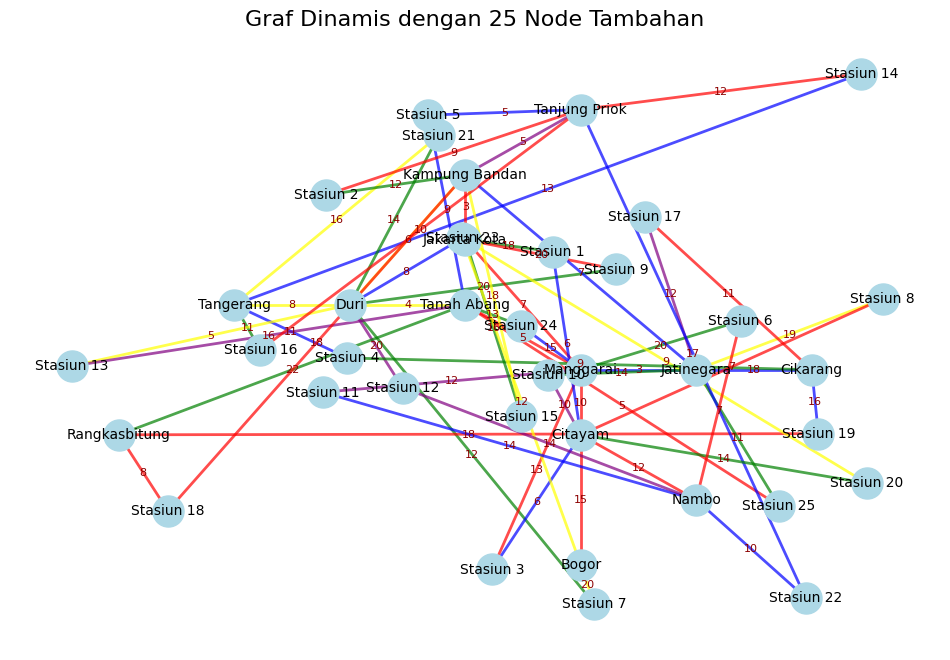

 Pengujian Algoritma dengan 25 Node Tambahan
Stasiun Awal: Stasiun 8
Stasiun Akhir: Stasiun 3

>>> Hasil DFS Iteratif:
  Jalur Terbaik : Stasiun 8 -> Citayam -> Stasiun 3
  Biaya Total   : 13
  Waktu Eksekusi: 0.000251 detik

>>> Hasil DFS Rekursif:
  Jalur Terbaik : Stasiun 8 -> Citayam -> Stasiun 3
  Biaya Total   : 13
  Waktu Eksekusi: 2.264467 detik



In [451]:
# Input size sebagai jumlah node tambahan
input_sizes = [0, 5, 10, 15, 20, 25]
iterative_times = []
recursive_times = []

for size in input_sizes:
    # Buat graf dinamis berdasarkan graf KRL statis dengan tambahan node
    dynamic_graph, dynamic_pos = create_dynamic_krl_graph(static_graph, size)

    # Visualisasi Graf Dinamis
    visualize_graph_with_edges(dynamic_graph, dynamic_pos, title=f"Graf Dinamis dengan {size} Node Tambahan")

    # Tentukan start dan end station
    start_station = random.choice(list(dynamic_graph.nodes()))
    reachable_nodes = nx.node_connected_component(dynamic_graph.to_undirected(), start_station)
    end_station = random.choice([node for node in reachable_nodes if node != start_station])

    print("=" * 50)
    print(f" Pengujian Algoritma dengan {size} Node Tambahan")
    print("=" * 50)
    print(f"Stasiun Awal: {start_station}")
    print(f"Stasiun Akhir: {end_station}\n")

    # Iteratif DFS
    print(">>> Hasil DFS Iteratif:")
    start_time = time.time()
    iterative_path, iterative_cost = dfs_iterative_weighted(nx.to_dict_of_dicts(dynamic_graph), start_station, end_station)
    iterative_time = time.time() - start_time
    iterative_times.append(iterative_time)
    print(f"  Jalur Terbaik : {' -> '.join(iterative_path)}")
    print(f"  Biaya Total   : {iterative_cost}")
    print(f"  Waktu Eksekusi: {iterative_time:.6f} detik\n")

    # Rekursif DFS
    print(">>> Hasil DFS Rekursif:")
    start_time = time.time()
    recursive_path, recursive_cost = dfs_recursive_weighted(nx.to_dict_of_dicts(dynamic_graph), start_station, end_station)
    recursive_time = time.time() - start_time
    recursive_times.append(recursive_time)
    print(f"  Jalur Terbaik : {' -> '.join(recursive_path)}")
    print(f"  Biaya Total   : {recursive_cost}")
    print(f"  Waktu Eksekusi: {recursive_time:.6f} detik\n")


> ## Perbandingan Waktu Eksekusi

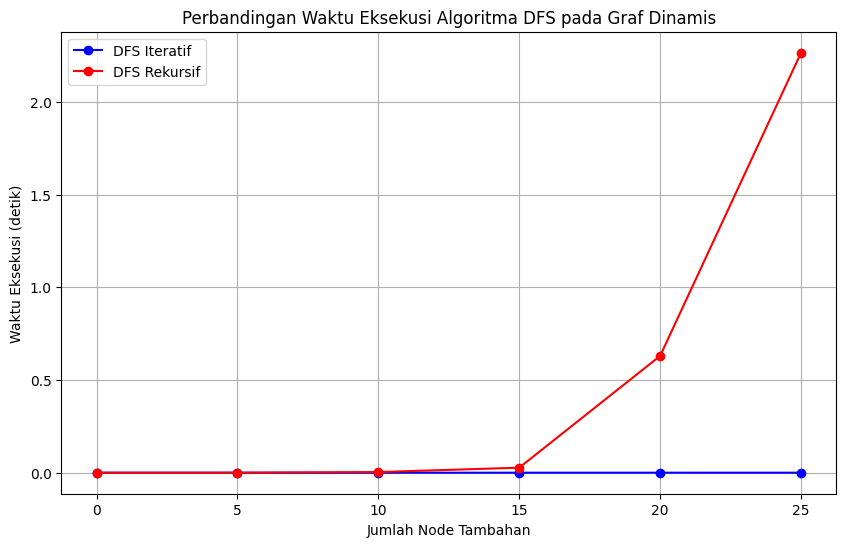

In [452]:
# Visualisasi Perbandingan Waktu Eksekusi
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, iterative_times, label='DFS Iteratif', marker='o', color='blue')
plt.plot(input_sizes, recursive_times, label='DFS Rekursif', marker='o', color='red')
plt.xlabel('Jumlah Node Tambahan')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Perbandingan Waktu Eksekusi Algoritma DFS pada Graf Dinamis')
plt.legend()
plt.grid()
plt.show()


# 3. Analisis Pola dan Kompleksitas

>## Regresi Linear


In [430]:
from sklearn.linear_model import LinearRegression

# Model Regresi
X = np.array(input_sizes).reshape(-1, 1)  # Ukuran input sebagai fitur
Y_iterative = np.array(iterative_times)  # Waktu iteratif sebagai target
Y_recursive = np.array(recursive_times)  # Waktu rekursif sebagai target

model_iterative = LinearRegression().fit(X, Y_iterative)
model_recursive = LinearRegression().fit(X, Y_recursive)

print(f"Iteratif Model: T(n) ≈ {model_iterative.coef_[0]:.4f}n + {model_iterative.intercept_:.4f}")
print(f"Rekursif Model: T(n) ≈ {model_recursive.coef_[0]:.4f}n + {model_recursive.intercept_:.4f}")


Iteratif Model: T(n) ≈ 0.0766n + -0.4715
Rekursif Model: T(n) ≈ 0.0377n + -0.2328
